In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import os
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from google.colab import drive

In [84]:
labels=np.load('/content/drive/My Drive/data_sk/sk_label.npy')
print(labels)
print(np.shape(labels))

data = np.load('/content/drive/My Drive/data_sk/sk_data.npy')
data = data.reshape(-1,150)
print(np.shape(data))


[32 32 32 ... 30 30 30]
(2455889,)
(2455889, 150)


In [96]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
data = np.array(data)
labels = np.array(labels)
# for a in range(1,53,1):
#   print("number of ",a,"data is:",list(labels).count(a))

In [86]:
le = LabelEncoder().fit(labels)   # LabelEncoder可以将标签分配一个0—n_classes-1之间的编码 
print(labels)
labels = np_utils.to_categorical(le.transform(labels), 51)  # 2是num_class表示输出的是2列数据的意思
print(np.shape(labels))

[32 32 32 ... 30 30 30]
(2455889, 51)


In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.20, 
                                                 stratify = labels, random_state = 42)

In [88]:
print(trainX.ndim)
print(trainX[0,:])
print(np.shape(trainY))
print(trainY)
print(np.shape(testX))
print(testY)

2
[-0.377055 -0.026934  3.025814 -0.364691  0.284957  3.028073 -0.349564
  0.588605  3.016449 -0.39029   0.717986  3.066255 -0.459398  0.4716
  3.055662 -0.483041  0.212356  2.976422 -0.503434 -0.013853  2.942299
 -0.479137 -0.064604  2.963459 -0.223132  0.482646  2.885534 -0.185799
  0.704586  2.742377 -0.254011  0.904521  2.701125 -0.248729  0.992251
  2.728316 -0.426401 -0.024353  3.027745 -0.40287  -0.466718  3.048902
 -0.360825 -0.825134  3.050612 -0.399207 -0.898123  2.960589 -0.317576
 -0.029164  2.950459 -0.246061 -0.504655  2.928659 -0.178083 -0.850512
  2.93332  -0.195286 -0.907308  2.842401 -0.353758  0.513552  3.022216
 -0.47695  -0.169477  2.96121  -0.513335 -0.095053  2.969337 -0.224274
  1.071196  2.742483 -0.202519  1.014843  2.684111  0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.      

In [89]:
model = Sequential()
# model.add(Conv2D(input_shape=(50,3,1),kernel_size=(3,3),filters=20,activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
# model.add(Conv2D(kernel_size=(3,3), filters=50,  activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
# model.add(Flatten())
model.add(Dense(1024,input_dim=150, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dense(51, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              154624    
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_38 (Dense)             (None, 51)                52275     
Total params: 2,306,099
Trainable params: 2,306,099
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

H = model.fit(trainX, trainY, validation_data = (testX, testY),
              batch_size = 64, epochs = 5, verbose = 1)  #verbose = 1显示进度条

Train on 1964711 samples, validate on 491178 samples
Epoch 1/5
1964711/1964711 [==============================] - 271s 138us/step - loss: 0.0444 - acc: 0.9854 - val_loss: 0.0365 - val_acc: 0.9876
Epoch 2/5
1964711/1964711 [==============================] - 269s 137us/step - loss: 0.0332 - acc: 0.9887 - val_loss: 0.0315 - val_acc: 0.9893
Epoch 3/5
1964711/1964711 [==============================] - 266s 135us/step - loss: 0.0295 - acc: 0.9900 - val_loss: 0.0289 - val_acc: 0.9903
Epoch 4/5
1964711/1964711 [==============================] - 262s 133us/step - loss: 0.0274 - acc: 0.9907 - val_loss: 0.0269 - val_acc: 0.9910
Epoch 5/5
1964711/1964711 [==============================] - 262s 133us/step - loss: 0.0260 - acc: 0.9912 - val_loss: 0.0256 - val_acc: 0.9914


In [91]:
predictions = model.predict(testX, batch_size = 64)
print(np.shape(predictions))
print(predictions.argmax(axis =1))
print(testY.argmax(axis = 1))
leclass = [str(i) for i in le.classes_]
print(leclass)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1),
                           target_names = leclass))

(491178, 51)
[14  1 22 ... 40 28 37]
[14 46 22 ... 40 37 42]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51']
              precision    recall  f1-score   support

           1       0.80      0.69      0.74      4639
           2       0.75      0.66      0.70     16495
           3       0.77      0.75      0.76     14890
           4       0.85      0.77      0.81      8462
           5       0.87      0.84      0.86      7663
           6       0.69      0.63      0.66      7945
           7       0.87      0.85      0.86      7828
           8       0.75      0.66      0.70     13519
           9       0.91      0.78      0.84      3540
          10       0.81      0.83      0.82     17856
          11       0.94      0.83      0.88   

In [0]:
model.save("/content/drive/My Drive/data_sk/sk_linear5.hdf5")

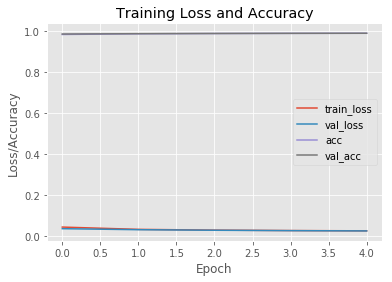

In [98]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, 5), H.history["acc"], label = "acc")
plt.plot(np.arange(0, 5), H.history["val_acc"], label = "val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()